# Music Recommender Engine


 ## *Spotify EDA & Recommendations*  
 
 <img src="spotify.png" align="left" width="200" height="200">

*Creating a Recommender Engine using features like danceability	energy key loudness, etc. from playlists extracted from Spotify using ***spotipy*** api*. 

### *FEATURES FROM THE DATASET*

***Danceability***: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

***Energy***: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

***Instrumentalness***: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

***Liveness***: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

***Loudness***: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

***Speechiness***: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

***Tempo***: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

***Valence***: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
 

In [1]:
import sys
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

In [2]:
CLIENT_ID = "Your Client ID"
CLIENT_SECRET = "Your Client Secret"

In [3]:
token = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
cache_token = token.get_access_token()
sp = spotipy.Spotify(cache_token)

<ipython-input-3-535d6a9da87f>:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  cache_token = token.get_access_token()


In [4]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [ ]:
a = analyze_playlist("Siddharth", "14fd8khEbeU4JXLVCEfQh6")
b = analyze_playlist("Susanna Ketola", "4rnleEAOdmFAbRcNCgZMpY")
c = analyze_playlist("Rohan Shah", "2IIMkL8TDEYoPkcbXm3DG2")
d = analyze_playlist("Alex Butcher", "71vQTtv3Ey9TdIOgLVDPjw")
e = analyze_playlist("redmusiccompany", "3yhmzZlOnRMCFV7PuMFPKy")
f = analyze_playlist("Guardian Music", "3r6cJgDDlo6zgkfqJU9FVq")
g = analyze_playlist("Chinmay", "075XpeEIaG4dMRmXXZFjqI")
h = analyze_playlist("Spotify", "37i9dQZF1DWXRqgorJj26U")
i = analyze_playlist("Spotify", "37i9dQZF1DX6GJXiuZRisr")
j = analyze_playlist("Spotify", "37i9dQZF1DX2UgsUIg75Vg")
k = analyze_playlist("Spotify", "37i9dQZF1DX32NsLKyzScr")
l = analyze_playlist("Spotify", "37i9dQZF1DX1tW4VlEfDSS")
m = analyze_playlist("Spotify", "37i9dQZF1DWY12BqhkMFW2")
n = analyze_playlist("Spotify", "37i9dQZF1DWSRMdeGCgprt")

In [ ]:
df = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n], axis=0,ignore_index=True)

In [ ]:
df

### *Analyzing a Playlist*

In [42]:
My_Playlist = analyze_playlist("Siddharth", "14fd8khEbeU4JXLVCEfQh6")
My_Playlist

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Bazzi,COSMIC,Mine,7uzmGiiJyRfuViKKK3lVmR,0.710,0.789,4,-3.874,1,0.0722,0.000003,0.4510,0.717,142.929,131064,4
1,ZAYN,Mind Of Mine (Deluxe Edition),PILLOWTALK,0PDUDa38GO8lMxLCRc4lL1,0.584,0.700,11,-4.275,1,0.0456,0.000000,0.0939,0.438,124.944,202747,4
2,Alex Aiono,Work The Middle,Work The Middle,42rB0s3mv8BpSKVBVkULvY,0.826,0.582,10,-7.162,0,0.2010,0.000005,0.1470,0.840,100.881,213112,4
3,Drake,More Life,Passionfruit,5mCPDVBb16L4XQwDdbRUpz,0.809,0.463,11,-11.377,1,0.0396,0.085000,0.1090,0.364,111.980,298941,4
4,Charlie Puth,Voicenotes,Slow It Down,6TapyDFlRUlZ4cmIaqJx4k,0.733,0.754,0,-3.392,0,0.0593,0.000000,0.1310,0.849,115.024,190053,4
5,Charlie Puth,Cheating on You,Cheating on You,0ClPIeT6MSgfSgQ9ZrJbAq,0.749,0.535,4,-6.785,1,0.0336,0.000036,0.0982,0.601,123.042,196607,4
6,Chris Isaak,Heart Shaped World,Wicked Game,34u3Bj1KVxKWfA07yDJ2vG,0.661,0.300,9,-18.055,1,0.0294,0.011800,0.0839,0.359,112.327,289067,4
7,Pink Floyd,The Wall,Comfortably Numb,5HNCy40Ni5BZJFw1TKzRsC,0.472,0.366,11,-12.595,0,0.0286,0.308000,0.0837,0.171,127.167,382297,4
8,Alex Aiono,Work The Middle (Acoustic Version),Work The Middle - Acoustic,5DHvDSGFyNI02zDeQSJ07V,0.669,0.265,4,-9.018,0,0.0463,0.000000,0.1430,0.639,119.119,222922,5
9,William Singe,Fake Love,Fake Love,5GRAeHxQLh6GXPxlTZREWN,0.658,0.324,9,-10.894,0,0.4370,0.000000,0.0935,0.502,114.631,160183,4


In [40]:
import matplotlib.pyplot as plt

In [41]:
# Analyzing Aggregate Playlist Features after rescaling
feature_Visualization = My_Playlist[['danceability','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo']]
feature_Visualization['loudness'] = -(feature_Visualization['loudness']/100)
feature_Visualization['tempo'] = feature_Visualization['tempo']/1000
feature_Visualization

<ipython-input-41-03f063773b43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_Visualization['loudness'] = -(feature_Visualization['loudness']/100)
<ipython-input-41-03f063773b43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_Visualization['tempo'] = feature_Visualization['tempo']/1000


,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0.710,0.789,0.000003,0.4510,0.03874,0.0722,0.717,0.142929
1,0.584,0.700,0.000000,0.0939,0.04275,0.0456,0.438,0.124944
2,0.826,0.582,0.000005,0.1470,0.07162,0.2010,0.840,0.100881
3,0.809,0.463,0.085000,0.1090,0.11377,0.0396,0.364,0.111980
4,0.733,0.754,0.000000,0.1310,0.03392,0.0593,0.849,0.115024
5,0.749,0.535,0.000036,0.0982,0.06785,0.0336,0.601,0.123042
6,0.661,0.300,0.011800,0.0839,0.18055,0.0294,0.359,0.112327
7,0.472,0.366,0.308000,0.0837,0.12595,0.0286,0.171,0.127167
8,0.669,0.265,0.000000,0.1430,0.09018,0.0463,0.639,0.119119
9,0.658,0.324,0.000000,0.0935,0.10894,0.4370,0.502,0.114631


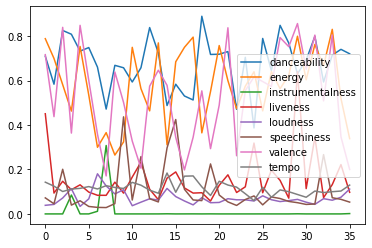

In [8]:
feature_Visualization.plot()

In [9]:
print('1) MAX FEATURES:\n', My_Playlist[['danceability','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo','key']].max(),'\n')
print('2) MEAN FEATURES:\n', My_Playlist[['danceability','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo','key']].mean(),'\n')
print('3) MIN FEATURES:\n', My_Playlist[['danceability','energy','instrumentalness','liveness','loudness','speechiness','valence','tempo','key']].min(), '\n')

1) MAX FEATURES:
 danceability          0.890
energy                0.831
instrumentalness      0.308
liveness              0.640
loudness             -3.392
speechiness           0.437
valence               0.857
tempo               184.112
key                  11.000
dtype: float64 

2) MEAN FEATURES:
 danceability          0.676972
energy                0.581889
instrumentalness      0.011335
liveness              0.158411
loudness             -7.096833
speechiness           0.104969
valence               0.533444
tempo               114.920583
key                   5.333333
dtype: float64 

3) MIN FEATURES:
 danceability         0.3870
energy               0.2650
instrumentalness     0.0000
liveness             0.0579
loudness           -18.0550
speechiness          0.0286
valence              0.1710
tempo               59.9890
key                  0.0000
dtype: float64 



*- This playlist suggests that the user likes music that has a high danceability and energy along with songs which have a high tempo.*

*- Valence suggests if the user has a positive outlook or negative outlook to music.* 

*- In this case the user likes music that is more positive and livelier.*

*- Loudness values in this playlist suggests that the user likes softer music.*

**All these features can really help generate personalized recommendations to users.**

In [10]:
from recommender.api import Recommender

recommender = Recommender(CLIENT_ID,CLIENT_SECRET)
recommender.artists = 'Johnny Cash'
recommender.genres = [
    'pop'
]

recommender.track_attributes = {
    'danceability': 0.676972,
    'energy': 0.581889,
    'instrumentalness': 0.011335,
    'liveness': 0.158411,
    'loudness': -7.096833,
    'speechiness': 0.104969,
    'valence': 0.533444,
    'tempo': 114.920583,
    'key': 5.33
}

recommendations = recommender.find_recommendations()
for recommendation in recommendations['tracks']:
    print("%s - %s - %s" % (recommendation['name'], recommendation['album']['name'], recommendation['artists'][0]['name'], ))

I Don't Need Your Rockin' Chair - Version w/special guests - The George Jones Collection - Mark Chesnutt
There You Go - Johnny Cash at Sun - Johnny Cash
On the Road Again - Live - Willie Nelson - 16 Biggest Hits - Willie Nelson
Let Me Explain - Let Me Explain - Bryson Tiller
Nights With You - Nights With You - MØ
You & I - Midnight Memories (Deluxe) - One Direction
Girls Like (feat. Zara Larsson) - YOUTH - Tinie Tempah
Out Among the Stars - Out Among The Stars - Johnny Cash
Happier - ÷ (Deluxe) - Ed Sheeran
The Way Life Goes (feat. Oh Wonder) - Luv Is Rage 2 - Lil Uzi Vert
Mirrors - The 20/20 Experience (Deluxe Version) - Justin Timberlake
Dollhouse - Cry Baby (Deluxe Edition) - Melanie Martinez
Ragged Old Flag - Ragged Old Flag - Johnny Cash
Dang! (feat. Anderson .Paak) - The Divine Feminine - Mac Miller
Roll On (Eighteen Wheeler) - Roll On - Alabama
That Lonesome Song - That Lonesome Song - Jamey Johnson
Pull Up (feat. Lil Uzi Vert) - Pull Up (feat. Lil Uzi Vert) - Wiz Khalifa
Want t

# Hypertuning Features 
Creating a scale for features to get the real sense of the users taste. 

In [57]:
#creating a base copy
scaled_features = My_Playlist[['danceability','energy','instrumentalness','liveness','speechiness','valence']]
scaled_features.head()

,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.710,0.789,0.000003,0.4510,0.0722,0.717
1,0.584,0.700,0.000000,0.0939,0.0456,0.438
2,0.826,0.582,0.000005,0.1470,0.2010,0.840
3,0.809,0.463,0.085000,0.1090,0.0396,0.364
4,0.733,0.754,0.000000,0.1310,0.0593,0.849


In [58]:
import math

def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

In [59]:
def scale(column):
    if column != 'loudness'and 'tempo'and 'key':
        l = []
        for i in scaled_features[column]:
            a = round_down(i, 1)
            l.append(a)
        scaled_features[column] = l
        print(str(column), l[0:5])

In [60]:
scale('danceability')
scale('energy')
scale('instrumentalness')
scale('liveness')
scale('speechiness')
scale('valence')

danceability [0.7, 0.5, 0.8, 0.8, 0.7]
energy [0.7, 0.7, 0.5, 0.4, 0.7]
instrumentalness [0.0, 0.0, 0.0, 0.0, 0.0]
liveness [0.4, 0.0, 0.1, 0.1, 0.1]
speechiness [0.0, 0.0, 0.2, 0.0, 0.0]
valence [0.7, 0.4, 0.8, 0.3, 0.8]


<ipython-input-59-2b740ba08822>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_features[column] = l


In [69]:
t = []
for i in My_Playlist['tempo']:
    a = int(math.ceil(i / 10.0)) * 10
    t.append(a)
scaled_features['tempo'] = t

<ipython-input-69-94a57830e63d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_features['tempo'] = t


In [70]:
scaled_features['key'] = My_Playlist['key']

<ipython-input-70-beff6faf87de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_features['key'] = My_Playlist['key']


In [74]:
scaled_features.mode()

,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo,key
0,0.7,0.7,0.0,0.1,0.0,0.5,130.0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


key has a two resepective modes of 1 and 11

In [105]:
from recommender.api import Recommender

recommender = Recommender(CLIENT_ID,CLIENT_SECRET)
recommender.artists = 'Johnny Cash'
recommender.genres = [
    'pop'
]

recommender.track_attributes = {
    'danceability': 0.7,
    'energy': 0.7,
    'instrumentalness': 0.0,
    'liveness': 0.2,
    'loudness': -7.0,
    'speechiness': 0.1,
    'valence': 0.6,
    'tempo': 130.0,
    'key' : [1,11] 
}

recommendations = recommender.find_recommendations()
count = 1

print('Top Recommendations: -')
for recommendation in recommendations['tracks']:
    print(count,'-', "%s - %s" % (recommendation['name'], recommendation['artists'][0]['name']))
    count+=1

Top Recommendations: -
1 - Dixieland Delight - Single Edit - Alabama
2 - I'm the One (feat. Justin Bieber, Quavo, Chance the Rapper & Lil Wayne) - DJ Khaled
3 - Baby Ride Easy (with June Carter Cash) - Johnny Cash
4 - Gentle On My Mind - Remastered 2001 - Glen Campbell
5 - Diggin' Up Bones - Randy Travis
6 - no tears left to cry - Ariana Grande
7 - Sweet Revenge - John Prine
8 - Song of the South - Alabama
9 - Back to You (feat. Bebe Rexha & Digital Farm Animals) - Louis Tomlinson
10 - We'll Meet Again - Johnny Cash
11 - False Alarm - The Weeknd
12 - I Mean It (feat. Remo) - G-Eazy
13 - These Days (feat. Jess Glynne, Macklemore & Dan Caplen) - Rudimental
14 - 7/11 - Beyoncé
15 - Boom Clap - Charli XCX
16 - When You Love Someone - James TW
17 - I Fall To Pieces - Single Version - Patsy Cline
18 - Dark as the Dungeon - Live at Folsom State Prison, Folsom, CA - January 1968 - Johnny Cash
19 - Beautiful (feat. Camila Cabello) - Bazzi
20 - Can't Feel My Face - The Weeknd


 **The above recommendations are tracks in pop genre with audio features closer and more personolized to the user's taste**.